## Loan Prediction


In this project I will attempt to use several supervised machine learning algorithms to model loan aproval. 

In [46]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

##### Load Data
This data is from a Kaggle dataset that can be found here: 
https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset?resource=download

Becuse the dataset is fairly small I will include it in the git repo for the grader's convience.

We see there are 614 records with both numeric and categorical data.

In [47]:
df = pd.read_csv('data/train_u6lujuX_CVtuZ9i.csv',index_col = False)
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


##### Data Cleaning and Labeling

Here we see there are some null values that will need to be dealt with along with the categorical values need to be turned into numeric values for a couple of sklearn's algorithims to use correctly.

In this first cell we look at each column to see how many nulls each cell has and if we need to eliminate enough columns. It doesnt look like we need to eliminate any column as a large percentage of each column is availble and we can impute the missing values. 

In [48]:
# removing Loan_ID as it wont help the model
col = df.columns.tolist()
col.remove('Loan_ID') 
df = df[col]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB
None


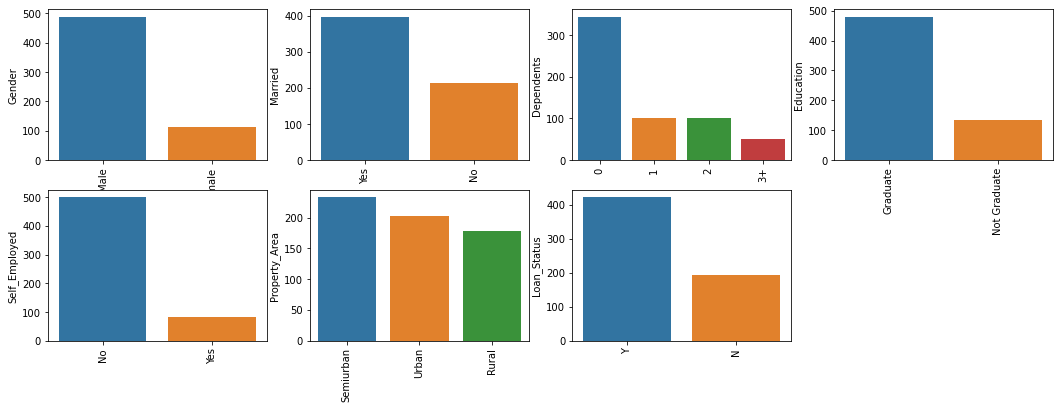

In [49]:

obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1
  
for col in object_cols:
  y = df[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

##### Data encoding and Imputation
Below I am encoding the categorical values with numerical lables for the better use of Machine learning algorithms.

In [50]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
  df[col] = label_encoder.fit_transform(df[col])


for c in df.columns:
  df[c] = df[c].fillna(df[c].mean()) 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


##### Heatmap

This heat map shows the correlation between columns. This helps us see what data features might be important and if there is parts of the data set that are corrleated that shouldn't be. For this implentation we want to see corelation with the y-value(Loan_Status) and lower correlation with x-values. If there is high correlations with x-data feilds we should look at removing them as that could affect our results. But we see that there are no super highly correlated data feilds in the x-data.

<AxesSubplot:>

<Figure size 1080x864 with 0 Axes>

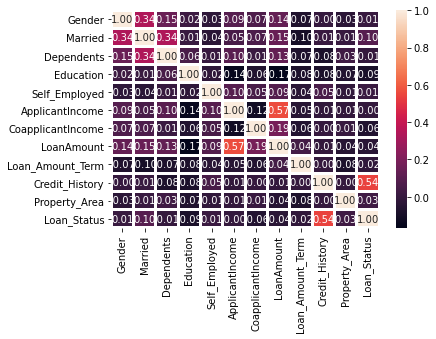

In [51]:

plt.figure(figsize=(15,12))
plt.figure(facecolor='white')
sns.heatmap(df.corr(),fmt='.2f',
            linewidths=2,annot=True)

In [52]:
y = df['Loan_Status']
col = df.columns.tolist()
col.remove('Loan_Status')
x = df[col]

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42)


#### Models
In this workbook we will look at the accuracy of 4 different supervised learning models: KNN, Random Forests, SVC, and Logistic Regression.

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

##### Random Forests
After looking at the best number of estimators we see that 7 estimators yeilds the best results with the smallest amount of resources.

In [54]:
for x in range(1,11):
    rf = RandomForestClassifier(n_estimators = x, random_state =42)
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_train)
    acc = 100*metrics.accuracy_score(y_train,y_pred)
    print('n_estimators = {}, accuracy = {}'.format(x,acc))

rf = RandomForestClassifier(n_estimators = 8, criterion = 'entropy', random_state =42)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
acc = 100*metrics.accuracy_score(y_test,y_pred)
print('n_estimators = 7, accuracy = {}'.format(acc))

n_estimators = 1, accuracy = 89.0020366598778
n_estimators = 2, accuracy = 87.9837067209776
n_estimators = 3, accuracy = 95.11201629327903
n_estimators = 4, accuracy = 93.48268839103869
n_estimators = 5, accuracy = 95.9266802443992
n_estimators = 6, accuracy = 95.5193482688391
n_estimators = 7, accuracy = 96.74134419551935
n_estimators = 8, accuracy = 97.75967413441956
n_estimators = 9, accuracy = 98.37067209775967
n_estimators = 10, accuracy = 98.98167006109979
n_estimators = 7, accuracy = 75.60975609756098


##### Logarithmic Regression

In [55]:
lr = LogisticRegression(random_state =42)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_train)
acc = 100*metrics.accuracy_score(y_train,y_pred)
print('accuracy = {}'.format(acc))

accuracy = 81.87372708757637


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### K-Nearest Neighbor

After looking at some options for the number of nearest neigbors we see that 3 is the best number of neighbors for this data set.

In [56]:
for x in range(2,11):
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_train)
    acc = 100*metrics.accuracy_score(y_train,y_pred)
    print('n_neighbors = {}, accuracy = {}'.format(x,acc))

knn = KNeighborsClassifier(n_neighbors=3)

n_neighbors = 2, accuracy = 79.42973523421588
n_neighbors = 3, accuracy = 77.59674134419552
n_neighbors = 4, accuracy = 73.31975560081466
n_neighbors = 5, accuracy = 73.72708757637476
n_neighbors = 6, accuracy = 71.89409368635438
n_neighbors = 7, accuracy = 74.13441955193483
n_neighbors = 8, accuracy = 73.5234215885947
n_neighbors = 9, accuracy = 72.91242362525459
n_neighbors = 10, accuracy = 73.11608961303462


##### SVM


In [57]:
svm = SVC().fit(x_train,y_train)
y_pred = lr.predict(x_test)
acc = 100*metrics.accuracy_score(y_test,y_pred)
print('accuracy = {}'.format(acc))

accuracy = 78.86178861788618


#### Train Data Model Overview
The training data shows fantastic results with Random forests leading the way in the high 90%. This is encouraging and will hopefully yeild high results on the test data.

In [58]:
for clf in (rf, knn, svm,lr):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_train)
    print(clf.__class__.__name__,
    ": Accuracy score of ",
          "=",100*metrics.accuracy_score(y_train, 
                                         y_pred))

RandomForestClassifier : Accuracy score of  = 98.16700610997964
KNeighborsClassifier : Accuracy score of  = 77.59674134419552
SVC : Accuracy score of  = 70.26476578411406
LogisticRegression : Accuracy score of  = 81.87372708757637


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Test Data Model Overview
The test data has lower accuracy than the train data that points to overfiting. This should be fixed with a larger data source. I would recomend that the company or organization invest in a data source with thousands or tens of thousands of data points. 

In [59]:
for clf in (rf, knn, svm,lr):
    clf.fit(x_test ,y_test)
    y_pred = clf.predict(x_train)
    print(clf.__class__.__name__,
    ": Accuracy score of ",
          "=",100*metrics.accuracy_score(y_train, 
                                         y_pred))

RandomForestClassifier : Accuracy score of  = 71.69042769857434
KNeighborsClassifier : Accuracy score of  = 60.4887983706721
SVC : Accuracy score of  = 69.65376782077392
LogisticRegression : Accuracy score of  = 80.44806517311609


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
